In [0]:
PIP_REQUIREMENTS = (
    "openai vllm==0.6.4.post1 httpx==0.27.2 "
    "transformers==4.46.3 accelerate==1.0.0 "
    "mlflow==2.19.0 "
    "git+https://github.com/stikkireddy/mlflow-extensions.git@v0.17.0"
)
%pip install {PIP_REQUIREMENTS}

dbutils.library.restartPython()

  Cloning https://github.com/stikkireddy/mlflow-extensions.git (to revision v0.17.0) to /tmp/pip-req-build-96o13j1u
  Running command git clone --filter=blob:none --quiet https://github.com/stikkireddy/mlflow-extensions.git /tmp/pip-req-build-96o13j1u
  Running command git checkout -q b21a87ffffc07bf14bd30c43729dddd84e88b1ac
  Resolved https://github.com/stikkireddy/mlflow-extensions.git to commit b21a87ffffc07bf14bd30c43729dddd84e88b1ac
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/44.1 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.9 MB/s eta 0:00:00
  Using cached mlflow-2.19.0-py3-none-any.whl.metadata (30 kB)
  Using cached uvicorn-0.34.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached pydantic-2.10.6-py3-none-any.whl.metadata (30 kB)
  Using cached prometheus_client-0.21.1-py3-none-any.whl.metadata (1.8 kB)
  Using cached prometheus_fastapi_in

In [0]:
PIP_REQUIREMENTS = (
    "openai==1.45.0 vllm==0.6.4.post1 httpx==0.27.2 "
    "transformers==4.46.3 accelerate==1.0.0 "
    "mlflow==2.19.0 "
    "git+https://github.com/stikkireddy/mlflow-extensions.git@v0.17.0"
)

###Change the below configs

In [0]:
CATALOG = 'mlops_pj'
SCHEMA = 'gsk_gsc_cfu_count'
MODEL_NAME = 'internvl-72b-awq'
ENDPOINT_NAME = 'internvl-72b_awq_instruct'
# LOCAL_PATH_TO_MODEL = '/Volumes/mlops_pj/gsk_gsc_cfu_count/hf_model/Qwen2-VL-2B-Instruct/'

In [0]:
from mlflow_extensions.serving.engines import VLLMEngineProcess
from mlflow_extensions.serving.engines.vllm_engine import VLLMEngineConfig
from mlflow_extensions.databricks.deploy.ez_deploy import EzDeployConfig, ServingConfig,EzDeployVllmOpenCompat

2025-02-20 10:35:21.190137: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740047721.204633    4226 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740047721.209137    4226 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-20 10:35:21.225681: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [0]:
deployer = EzDeployVllmOpenCompat(
  config= EzDeployConfig(
    name="InternVL2_5-78B-MPO-AWQ",
    engine_proc=VLLMEngineProcess,
    engine_config=VLLMEngineConfig(
          model="OpenGVLab/InternVL2_5-78B-MPO-AWQ", # copy the Hf link
          guided_decoding_backend="outlines",
          vllm_command_flags={
              "--gpu-memory-utilization": 0.97,
              "--quantization" : "awq",
              "--dtype": "float16",
              "--enforce-eager": None,
              "--enable-auto-tool-choice" : None,
              "--tool-call-parser" : "hermes"
          },
          max_model_len=15000,
          max_num_images=2
),
  serving_config=ServingConfig(
      # rough estimate for the engines this includes model weights + kv cache + overhead + intermediate states
      minimum_memory_in_gb=50,
  ),
  pip_config_override = PIP_REQUIREMENTS.split(" ")
),
  registered_model_name=f"{CATALOG}.{SCHEMA}.{MODEL_NAME}"
)

In [0]:
deployer.download()

Fetching 45 files:   0%|          | 0/45 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/744 [00:00<?, ?B/s]

In [0]:
deployer.register()

/local_disk0/.ephemeral_nfs/envs/pythonEnv-a1ed2025-3ace-432c-8067-f191127fe542/lib/python3.12/site-packages/mlflow_extensions/serving/model.py


2025/02/04 14:13:01 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - openai (current: 1.55.1, required: openai==1.45.0)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2025/02/04 14:13:01 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - openai (current: 1.55.1, required: openai==1.45.0)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


2025-02-04 14:13:02 [debug    ] entry: start_proc              signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>, <mlflow.pyfunc.model.PythonModelContext object at 0x7f5a61f998e0>'
2025-02-04 14:13:05 [info     ] Attempting to acquire Lock    
2025-02-04 14:13:05 [info     ] Acquired Lock                 
2025-02-04 14:13:05 [error    ] Health check failed with error [Errno 111] Connection refused; server may not be up yet or crashed;
2025-02-04 14:13:05 [debug    ] entry: _spawn_server_proc      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>, <mlflow.pyfunc.model.PythonModelContext object at 0x7f5a61f998e0>'
2025-02-04 14:13:05 [debug    ] entry: to_run_command          signature="VLLMEngineConfig(model='OpenGVLab/InternVL2_5-78B-MPO-AWQ', host='0.0.0.0', port=9989, openai_api_path='v1', ensure_supported_models=True, library_overrides={}, entrypoint_module='vllm.entrypoints.opena

2025-02-04 14:13:09.944825: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738678389.959411    5131 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738678389.963869    5131 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 14:13:09.979333: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2025-02-04 14:13:10 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:10 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:10 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:10 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:10 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:10 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:10 [info     ] Waiting for vllm-engine to start
2025-02-04 14:13:11 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:11 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:11 [debug  

2025-02-04 14:13:17.852515: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738678397.867012    5260 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738678397.871508    5260 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 14:13:17.887086: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2025-02-04 14:13:18 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:18 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:18 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:18 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:18 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:18 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:18 [info     ] Waiting for vllm-engine to start
2025-02-04 14:13:19 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:19 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:19 [debug  

Loading pt checkpoint shards:   0% Completed | 0/27 [00:00<?, ?it/s]
/local_disk0/.ephemeral_nfs/envs/pythonEnv-a1ed2025-3ace-432c-8067-f191127fe542/lib/python3.12/site-packages/vllm/model_executor/model_loader/weight_utils.py:425: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control o

2025-02-04 14:13:34 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:34 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:34 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:34 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:34 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:34 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:34 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:   4% Completed | 1/27 [00:01<00:29,  1.15s/it]


2025-02-04 14:13:35 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:35 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:35 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:35 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:35 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:35 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:35 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:   7% Completed | 2/27 [00:02<00:28,  1.13s/it]


2025-02-04 14:13:36 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:36 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:36 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:36 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:36 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:36 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:36 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  11% Completed | 3/27 [00:03<00:27,  1.13s/it]


2025-02-04 14:13:37 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:37 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:37 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:37 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:37 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:37 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:37 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  15% Completed | 4/27 [00:04<00:25,  1.11s/it]


2025-02-04 14:13:38 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:38 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:38 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:38 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:38 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:38 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:38 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  19% Completed | 5/27 [00:05<00:24,  1.10s/it]


2025-02-04 14:13:39 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:39 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:39 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:39 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:39 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:39 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:39 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  22% Completed | 6/27 [00:06<00:23,  1.10s/it]


2025-02-04 14:13:40 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:40 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:40 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:40 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:40 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:40 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:40 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  26% Completed | 7/27 [00:07<00:21,  1.10s/it]


2025-02-04 14:13:41 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:41 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:41 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:41 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:41 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:41 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:41 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  30% Completed | 8/27 [00:08<00:20,  1.10s/it]


2025-02-04 14:13:42 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:42 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:42 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:42 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:42 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:42 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:42 [info     ] Waiting for vllm-engine to start
2025-02-04 14:13:43 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:43 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:43 [debug  

Loading pt checkpoint shards:  33% Completed | 9/27 [00:09<00:19,  1.10s/it]


2025-02-04 14:13:44 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:44 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:44 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:44 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:44 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:44 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:44 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  37% Completed | 10/27 [00:11<00:18,  1.11s/it]


2025-02-04 14:13:45 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:45 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:45 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:45 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:45 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:45 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:45 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  41% Completed | 11/27 [00:12<00:17,  1.10s/it]


2025-02-04 14:13:46 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:46 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:46 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:46 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:46 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:46 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:46 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  44% Completed | 12/27 [00:13<00:16,  1.11s/it]


2025-02-04 14:13:47 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:47 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:47 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:47 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:47 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:47 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:47 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  48% Completed | 13/27 [00:14<00:15,  1.11s/it]


2025-02-04 14:13:48 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:48 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:48 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:48 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:48 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:48 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:48 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  52% Completed | 14/27 [00:15<00:14,  1.12s/it]


2025-02-04 14:13:49 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:49 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:49 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:49 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:49 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:49 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:49 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  56% Completed | 15/27 [00:16<00:13,  1.10s/it]


2025-02-04 14:13:50 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:50 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:50 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:50 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:50 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:50 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:50 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  59% Completed | 16/27 [00:17<00:12,  1.09s/it]


2025-02-04 14:13:51 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:51 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:51 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:51 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:51 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:51 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:51 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  63% Completed | 17/27 [00:18<00:10,  1.10s/it]


2025-02-04 14:13:52 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:52 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:52 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:52 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:52 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:52 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:52 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  67% Completed | 18/27 [00:19<00:09,  1.09s/it]


2025-02-04 14:13:53 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:53 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:53 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:53 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:53 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:53 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:53 [info     ] Waiting for vllm-engine to start
2025-02-04 14:13:54 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:54 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:54 [debug  

Loading pt checkpoint shards:  70% Completed | 19/27 [00:20<00:08,  1.09s/it]


2025-02-04 14:13:55 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:55 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:55 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:55 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:55 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:55 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:55 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  74% Completed | 20/27 [00:22<00:07,  1.13s/it]


2025-02-04 14:13:56 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:56 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:56 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:56 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:56 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:56 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:56 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  78% Completed | 21/27 [00:23<00:07,  1.17s/it]


2025-02-04 14:13:57 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:57 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:57 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:57 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:57 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:57 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:57 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  81% Completed | 22/27 [00:24<00:05,  1.19s/it]


2025-02-04 14:13:58 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:58 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:58 [debug    ] exit: is_port_open             result=False
2025-02-04 14:13:58 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:13:58 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:58 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:13:58 [info     ] Waiting for vllm-engine to start
2025-02-04 14:13:59 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:13:59 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:13:59 [debug  

Loading pt checkpoint shards:  85% Completed | 23/27 [00:25<00:04,  1.22s/it]
Loading pt checkpoint shards:  89% Completed | 24/27 [00:26<00:02,  1.05it/s]


2025-02-04 14:14:00 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:14:00 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:14:00 [debug    ] exit: is_port_open             result=False
2025-02-04 14:14:00 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:14:00 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:14:00 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:14:00 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  93% Completed | 25/27 [00:27<00:01,  1.01it/s]


2025-02-04 14:14:01 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:14:01 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:14:01 [debug    ] exit: is_port_open             result=False
2025-02-04 14:14:01 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:14:01 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:14:01 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:14:01 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  96% Completed | 26/27 [00:28<00:01,  1.03s/it]


2025-02-04 14:14:02 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:14:02 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:14:02 [debug    ] exit: is_port_open             result=False
2025-02-04 14:14:02 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:14:02 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:14:02 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:14:02 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards: 100% Completed | 27/27 [00:29<00:00,  1.04s/it]
Loading pt checkpoint shards: 100% Completed | 27/27 [00:29<00:00,  1.09s/it]



INFO 02-04 14:14:03 model_runner.py:1077] Loading model weights took 49.4192 GB
2025-02-04 14:14:03 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:14:03 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:14:03 [debug    ] exit: is_port_open             result=False
2025-02-04 14:14:03 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:14:03 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:14:03 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:14:03 [info     ] Waiting for vllm-engine to start
2025-02-04 14:14:04 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:14:04 [debug    ] entry: 

INFO:     Started server process [5131]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:9989 (Press CTRL+C to quit)


2025-02-04 14:14:23 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:14:23 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:14:23 [debug    ] exit: is_port_open             result=True
INFO:     127.0.0.1:45710 - "GET /health HTTP/1.1" 200 OK
2025-02-04 14:14:23 [debug    ] exit: is_process_healthy       result=True
2025-02-04 14:14:23 [debug    ] exit: _spawn_server_proc       result=None
2025-02-04 14:14:23 [debug    ] entry: ensure_server_is_running signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>, context=<mlflow.pyfunc.model.PythonModelContext object at 0x7f5a61f998e0>'
2025-02-04 14:14:23 [debug    ] exit: start_proc               result=None
2025-02-04 14:14:23 [info     ] Ensuring vllm-engine is running for pid 5131
2025-02-04 14:14:23 [debug    ] entry: _is_process_running     sig

Uploading artifacts:   0%|          | 0/148 [00:00<?, ?it/s]

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

2025-02-04 14:14:33 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:14:33 [debug    ] exit: _is_process_running      result=True
INFO 02-04 14:14:34 metrics.py:449] Avg prompt throughput: 2.8 tokens/s, Avg generation throughput: 0.9 tokens/s, Running: 0 reqs, Swapped: 0 reqs, Pending: 0 reqs, GPU KV cache usage: 0.0%, CPU KV cache usage: 0.0%.


Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

2025-02-04 14:14:43 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:14:43 [debug    ] exit: _is_process_running      result=True
INFO 02-04 14:14:44 metrics.py:449] Avg prompt throughput: 0.0 tokens/s, Avg generation throughput: 0.0 tokens/s, Running: 0 reqs, Swapped: 0 reqs, Pending: 0 reqs, GPU KV cache usage: 0.0%, CPU KV cache usage: 0.0%.


Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

2025-02-04 14:14:53 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:14:53 [debug    ] exit: _is_process_running      result=True
INFO 02-04 14:14:54 metrics.py:449] Avg prompt throughput: 0.0 tokens/s, Avg generation throughput: 0.0 tokens/s, Running: 0 reqs, Swapped: 0 reqs, Pending: 0 reqs, GPU KV cache usage: 0.0%, CPU KV cache usage: 0.0%.


2025-02-04 14:15:03 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:15:03 [debug    ] exit: _is_process_running      result=True


INFO 02-04 14:15:04 metrics.py:449] Avg prompt throughput: 0.0 tokens/s, Avg generation throughput: 0.0 tokens/s, Running: 0 reqs, Swapped: 0 reqs, Pending: 0 reqs, GPU KV cache usage: 0.0%, CPU KV cache usage: 0.0%.


Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Registered model 'mlops_pj.gsk_gsc_cfu_count.internvl-72b-awq' already exists. Creating a new version of this model...


Uploading artifacts:   0%|          | 0/148 [00:00<?, ?it/s]

2025-02-04 14:15:13 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:15:13 [debug    ] exit: _is_process_running      result=True


Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

INFO 02-04 14:15:14 metrics.py:449] Avg prompt throughput: 0.0 tokens/s, Avg generation throughput: 0.0 tokens/s, Running: 0 reqs, Swapped: 0 reqs, Pending: 0 reqs, GPU KV cache usage: 0.0%, CPU KV cache usage: 0.0%.


Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

2025-02-04 14:15:23 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:15:23 [debug    ] exit: _is_process_running      result=True


Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

INFO 02-04 14:15:24 metrics.py:449] Avg prompt throughput: 0.0 tokens/s, Avg generation throughput: 0.0 tokens/s, Running: 0 reqs, Swapped: 0 reqs, Pending: 0 reqs, GPU KV cache usage: 0.0%, CPU KV cache usage: 0.0%.


Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

2025-02-04 14:15:33 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:15:33 [debug    ] exit: _is_process_running      result=True
INFO 02-04 14:15:34 metrics.py:449] Avg prompt throughput: 0.0 tokens/s, Avg generation throughput: 0.0 tokens/s, Running: 0 reqs, Swapped: 0 reqs, Pending: 0 reqs, GPU KV cache usage: 0.0%, CPU KV cache usage: 0.0%.


Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

2025-02-04 14:15:43 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:15:43 [debug    ] exit: _is_process_running      result=True
INFO 02-04 14:15:44 metrics.py:449] Avg prompt throughput: 0.0 tokens/s, Avg generation throughput: 0.0 tokens/s, Running: 0 reqs, Swapped: 0 reqs, Pending: 0 reqs, GPU KV cache usage: 0.0%, CPU KV cache usage: 0.0%.
2025-02-04 14:15:53 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:15:53 [debug    ] exit: _is_process_running      result=True
INFO 02-04 14:15:54 metrics.py:449] Avg prompt throughput: 0.0 tokens/s, Avg generation throughput: 0.0 tokens/s, Running: 0 reqs, Swapped: 0 reqs, Pending: 0 reqs, GPU KV cache usage: 0.0%, CPU KV cache usage: 0.0%.
2025-02-04 14:16:03 [debug    ] entry: _is_process_running     signature='<mlflow_ex

Uploading /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmp1qahbzg8/model/artifacts/InternVL2_5-78B-MPO-AWQ/…

2025-02-04 14:16:23 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:16:23 [debug    ] exit: _is_process_running      result=True


INFO 02-04 14:16:24 metrics.py:449] Avg prompt throughput: 0.0 tokens/s, Avg generation throughput: 0.0 tokens/s, Running: 0 reqs, Swapped: 0 reqs, Pending: 0 reqs, GPU KV cache usage: 0.0%, CPU KV cache usage: 0.0%.


Created version '8' of model 'mlops_pj.gsk_gsc_cfu_count.internvl-72b-awq'.


2025-02-04 14:16:33 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f59fe2c7110>'
2025-02-04 14:16:33 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:16:34 [debug    ] entry: to_run_command          signature="VLLMEngineConfig(model='OpenGVLab/InternVL2_5-78B-MPO-AWQ', host='0.0.0.0', port=9989, openai_api_path='v1', ensure_supported_models=True, library_overrides={}, entrypoint_module='vllm.entrypoints.openai.api_server', enable_experimental_chunked_prefill=False, max_num_batched_tokens=None, enable_prefix_caching=False, vllm_command_flags={'--gpu-memory-utilization': 0.97, '--quantization': 'awq', '--dtype': 'float16', '--enforce-eager': None, '--enable-auto-tool-choice': None, '--tool-call-parser': 'hermes'}, trust_remote_code=False, max_model_len=15000, served_model_alias=None, guided_decoding_backend='outlines', tokenizer=None, max_num_images=2, max_num_videos=None, max_num_aud

# Below is the code to deploy the endpoint to model serving

In [0]:
# deployer.deploy(ENDPOINT_NAME, scale_to_zero=False)

com.databricks.backend.common.rpc.CommandCancelledException
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$5(SequenceExecutionState.scala:136)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3(SequenceExecutionState.scala:136)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3$adapted(SequenceExecutionState.scala:133)
	at scala.collection.immutable.Range.foreach(Range.scala:158)
	at com.databricks.spark.chauffeur.SequenceExecutionState.cancel(SequenceExecutionState.scala:133)
	at com.databricks.spark.chauffeur.ExecContextState.cancelRunningSequence(ExecContextState.scala:717)
	at com.databricks.spark.chauffeur.ExecContextState.$anonfun$cancel$1(ExecContextState.scala:435)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:435)
	at com.databricks.spark.chauffeur.ExecutionContextManagerV1.can

## Kill the existing process and reload model from the UC (Run the below cell every time you want to restart the process)

In [0]:
from mlflow_extensions.testing.helper import kill_processes_containing

kill_processes_containing("vllm")
kill_processes_containing("ray")
kill_processes_containing("from multiprocessing")

2025-02-04 14:35:25 [info     ] Found orphaned process: root       40612  4.8  0.5 9905820 1241968 ?     Ssl  14:27   0:11 /local_disk0/.ephemeral_nfs/envs/pythonEnv-a1ed2025-3ace-432c-8067-f191127fe542/bin/python -m vllm.entrypoints.openai.api_server --host 0.0.0.0 --port 9989 --model /local_disk0/repl_tmp_data/ReplId-194d1-42fc3-8/tmpathh3dev/artifacts/InternVL2_5-78B-MPO-AWQ --served-model-name OpenGVLab/InternVL2_5-78B-MPO-AWQ --served-model-name default --tensor-parallel-size 1 --dtype float16 --enable-auto-tool-choice --enforce-eager --gpu-memory-utilization 0.97 --quantization awq --tool-call-parser hermes --max-model-len 15000 --guided-decoding-backend outlines --limit-mm-per-prompt image=2 matching vllm
Killed process with PID 40612
2025-02-04 14:35:25 [info     ] Found orphaned process: root       42162  0.0  0.0  21140 12872 ?        S    14:28   0:00 /local_disk0/.ephemeral_nfs/envs/pythonEnv-a1ed2025-3ace-432c-8067-f191127fe542/bin/python -c from multiprocessing.resource_t

In [0]:
# from mlflow.models import validate_serving_input
import mlflow
model_uri =f"models:/{CATALOG}.{SCHEMA}.{MODEL_NAME}/8"

pyfunc_model = mlflow.pyfunc.load_model(model_uri)

base_url = str(pyfunc_model.unwrap_python_model()._engine._server_http_client.base_url)

print("base_url:",base_url)


2025/02/04 14:38:35 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - openai (current: 1.55.1, required: openai==1.45.0)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


2025-02-04 14:38:35 [debug    ] entry: start_proc              signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>, <mlflow.pyfunc.model.PythonModelContext object at 0x7f2ffdb20e90>'
2025-02-04 14:38:40 [info     ] Attempting to acquire Lock    
2025-02-04 14:38:40 [info     ] Acquired Lock                 
2025-02-04 14:38:40 [error    ] Health check failed with error [Errno 111] Connection refused; server may not be up yet or crashed;
2025-02-04 14:38:40 [debug    ] entry: _spawn_server_proc      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>, <mlflow.pyfunc.model.PythonModelContext object at 0x7f2ffdb20e90>'
2025-02-04 14:38:40 [debug    ] entry: to_run_command          signature="VLLMEngineConfig(model='OpenGVLab/InternVL2_5-78B-MPO-AWQ', host='0.0.0.0', port=9989, openai_api_path='v1', ensure_supported_models=True, library_overrides={}, entrypoint_module='vllm.entrypoints.opena

2025-02-04 14:38:44.777253: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738679924.791446   98410 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738679924.795778   98410 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 14:38:44.811136: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2025-02-04 14:38:45 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:38:45 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:38:45 [debug    ] exit: is_port_open             result=False
2025-02-04 14:38:45 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:38:45 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:38:45 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:38:45 [info     ] Waiting for vllm-engine to start
2025-02-04 14:38:46 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:38:46 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:38:46 [debug  

2025-02-04 14:38:52.868222: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738679932.882892   98493 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738679932.887420   98493 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 14:38:52.902970: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2025-02-04 14:38:53 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:38:53 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:38:53 [debug    ] exit: is_port_open             result=False
2025-02-04 14:38:53 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:38:53 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:38:53 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:38:53 [info     ] Waiting for vllm-engine to start
2025-02-04 14:38:54 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:38:54 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:38:54 [debug  

Loading pt checkpoint shards:   0% Completed | 0/27 [00:00<?, ?it/s]
/local_disk0/.ephemeral_nfs/envs/pythonEnv-a1ed2025-3ace-432c-8067-f191127fe542/lib/python3.12/site-packages/vllm/model_executor/model_loader/weight_utils.py:425: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control o

2025-02-04 14:39:09 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:09 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:09 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:09 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:09 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:09 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:09 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:   4% Completed | 1/27 [00:01<00:31,  1.20s/it]


2025-02-04 14:39:10 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:10 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:10 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:10 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:10 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:10 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:10 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:   7% Completed | 2/27 [00:02<00:29,  1.19s/it]


2025-02-04 14:39:11 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:11 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:11 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:11 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:11 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:11 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:11 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  11% Completed | 3/27 [00:03<00:28,  1.17s/it]


2025-02-04 14:39:12 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:12 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:12 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:12 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:12 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:12 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:12 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  15% Completed | 4/27 [00:04<00:26,  1.14s/it]


2025-02-04 14:39:13 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:13 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:13 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:13 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:13 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:13 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:13 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  19% Completed | 5/27 [00:05<00:24,  1.13s/it]


2025-02-04 14:39:14 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:14 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:14 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:14 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:14 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:14 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:14 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  22% Completed | 6/27 [00:06<00:23,  1.14s/it]


2025-02-04 14:39:15 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:15 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:15 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:15 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:15 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:15 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:15 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  26% Completed | 7/27 [00:08<00:22,  1.13s/it]


2025-02-04 14:39:16 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:16 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:16 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:16 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:16 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:16 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:16 [info     ] Waiting for vllm-engine to start
2025-02-04 14:39:17 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:17 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:17 [debug  

Loading pt checkpoint shards:  30% Completed | 8/27 [00:09<00:21,  1.13s/it]


2025-02-04 14:39:18 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:18 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:18 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:18 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:18 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:18 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:18 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  33% Completed | 9/27 [00:10<00:20,  1.13s/it]


2025-02-04 14:39:19 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:19 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:19 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:19 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:19 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:19 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:19 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  37% Completed | 10/27 [00:11<00:19,  1.13s/it]


2025-02-04 14:39:20 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:20 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:20 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:20 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:20 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:20 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:20 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  41% Completed | 11/27 [00:12<00:18,  1.13s/it]


2025-02-04 14:39:21 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:21 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:21 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:21 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:21 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:21 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:21 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  44% Completed | 12/27 [00:13<00:17,  1.14s/it]


2025-02-04 14:39:22 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:22 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:22 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:22 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:22 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:22 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:22 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  48% Completed | 13/27 [00:14<00:15,  1.14s/it]


2025-02-04 14:39:23 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:23 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:23 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:23 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:23 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:23 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:23 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  52% Completed | 14/27 [00:15<00:14,  1.14s/it]


2025-02-04 14:39:24 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:24 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:24 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:24 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:24 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:24 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:24 [info     ] Waiting for vllm-engine to start
2025-02-04 14:39:25 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:25 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:25 [debug  

Loading pt checkpoint shards:  56% Completed | 15/27 [00:17<00:13,  1.13s/it]


2025-02-04 14:39:26 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:26 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:26 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:26 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:26 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:26 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:26 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  59% Completed | 16/27 [00:18<00:12,  1.12s/it]


2025-02-04 14:39:27 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:27 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:27 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:27 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:27 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:27 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:27 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  63% Completed | 17/27 [00:19<00:11,  1.12s/it]


2025-02-04 14:39:28 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:28 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:28 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:28 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:28 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:28 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:28 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  67% Completed | 18/27 [00:20<00:10,  1.12s/it]


2025-02-04 14:39:29 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:29 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:29 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:29 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:29 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:29 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:29 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  70% Completed | 19/27 [00:21<00:08,  1.12s/it]


2025-02-04 14:39:30 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:30 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:30 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:30 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:30 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:30 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:30 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  74% Completed | 20/27 [00:22<00:08,  1.17s/it]


2025-02-04 14:39:31 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:31 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:31 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:31 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:31 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:31 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:31 [info     ] Waiting for vllm-engine to start
2025-02-04 14:39:32 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:32 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:32 [debug  

Loading pt checkpoint shards:  78% Completed | 21/27 [00:24<00:07,  1.21s/it]


2025-02-04 14:39:33 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:33 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:33 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:33 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:33 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:33 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:33 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  81% Completed | 22/27 [00:25<00:06,  1.24s/it]


2025-02-04 14:39:34 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:34 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:34 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:34 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:34 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:34 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:34 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  85% Completed | 23/27 [00:26<00:05,  1.26s/it]


2025-02-04 14:39:35 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:35 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:35 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:35 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:35 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:35 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:35 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  89% Completed | 24/27 [00:27<00:02,  1.01it/s]


2025-02-04 14:39:36 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:36 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:36 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:36 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:36 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:36 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:36 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  93% Completed | 25/27 [00:28<00:02,  1.03s/it]


2025-02-04 14:39:37 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:37 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:37 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:37 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:37 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:37 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:37 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards:  96% Completed | 26/27 [00:29<00:01,  1.06s/it]


2025-02-04 14:39:38 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:38 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:38 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:38 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:38 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:38 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:38 [info     ] Waiting for vllm-engine to start


Loading pt checkpoint shards: 100% Completed | 27/27 [00:30<00:00,  1.08s/it]
Loading pt checkpoint shards: 100% Completed | 27/27 [00:30<00:00,  1.13s/it]



INFO 02-04 14:39:38 model_runner.py:1077] Loading model weights took 49.4192 GB
2025-02-04 14:39:39 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:39 [debug    ] entry: is_port_open            signature="'0.0.0.0', 9989"
2025-02-04 14:39:39 [debug    ] exit: is_port_open             result=False
2025-02-04 14:39:39 [debug    ] exit: is_process_healthy       result=False
2025-02-04 14:39:39 [debug    ] entry: _is_process_running     signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:39 [debug    ] exit: _is_process_running      result=True
2025-02-04 14:39:39 [info     ] Waiting for vllm-engine to start
2025-02-04 14:39:40 [debug    ] entry: is_process_healthy      signature='<mlflow_extensions.serving.engines.vllm_engine.VLLMEngineProcess object at 0x7f2ffdc0d790>'
2025-02-04 14:39:40 [debug    ] entry: 

INFO:     Started server process [98410]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:9989 (Press CTRL+C to quit)


base_url: http://0.0.0.0:9989


# Using the predict function to prompt the llm

In [0]:
# The model is logged with an input example. MLflow converts
# it into the serving payload format for the deployed model endpoint,
# and saves it to 'serving_input_payload.json'
serving_payload = {
  "messages": [
    {
      "role": "system",
      "content": "You are a helpful assistant."
    },
    {
      "role": "user",
      "content": "Hello!"
    }
  ],
  "temperature": 1.0,
  "max_tokens": 10,

}
pyfunc_model.predict(serving_payload)

INFO 02-04 14:39:58 logger.py:37] Received request chatcmpl-995e8048500b498384ef7ae9d84fe5a2: prompt: '<|im_start|>system\nYou are a helpful assistant.<|im_end|>\n<|im_start|>user\nHello!<|im_end|>\n<|im_start|>assistant\n', params: SamplingParams(n=1, presence_penalty=0.0, frequency_penalty=0.0, repetition_penalty=1.0, temperature=1.0, top_p=1.0, top_k=-1, min_p=0.0, seed=None, stop=[], stop_token_ids=[], bad_words=[], include_stop_str_in_output=False, ignore_eos=False, max_tokens=10, min_tokens=0, logprobs=None, prompt_logprobs=None, skip_special_tokens=True, spaces_between_special_tokens=True, truncate_prompt_tokens=None, guided_decoding=None), prompt_token_ids: None, lora_request: None, prompt_adapter_request: None.
INFO 02-04 14:39:58 engine.py:267] Added request chatcmpl-995e8048500b498384ef7ae9d84fe5a2.
INFO:     127.0.0.1:51054 - "POST /v1/chat/completions HTTP/1.1" 200 OK


{'id': 'chatcmpl-995e8048500b498384ef7ae9d84fe5a2',
 'object': 'chat.completion',
 'created': 1738679998,
 'model': 'default',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': 'Hello! How can I assist you today?',
    'tool_calls': []},
   'logprobs': None,
   'finish_reason': 'stop',
   'stop_reason': None}],
 'usage': {'prompt_tokens': 21,
  'total_tokens': 31,
  'completion_tokens': 10,
  'prompt_tokens_details': None},
 'prompt_logprobs': None}


# Test Prompting on an Image

## Ask a question to an image

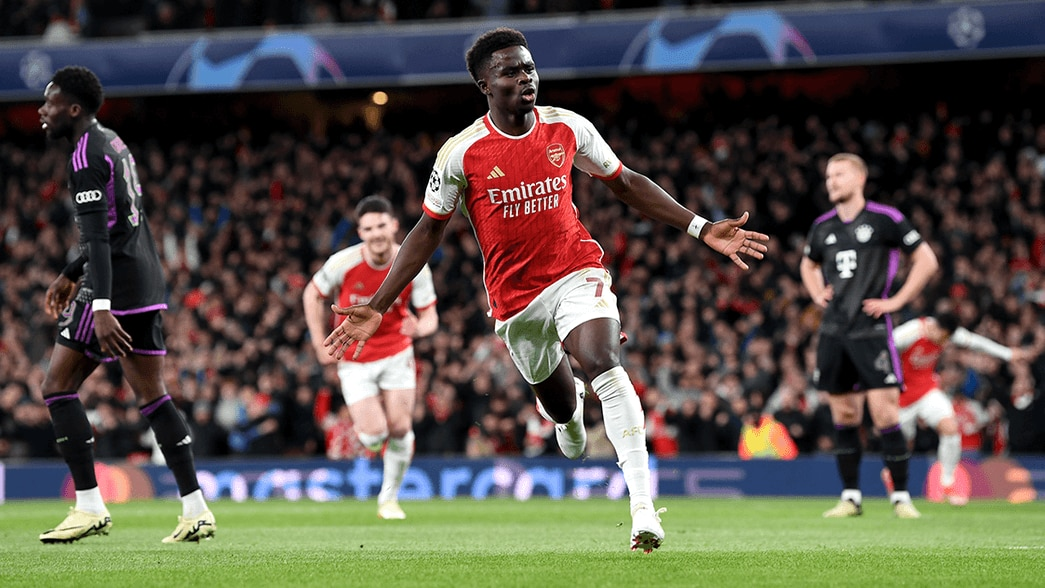

In [0]:
import urllib.request
from PIL import Image
from io import BytesIO 

image_url = "https://www.arsenal.com/sites/default/files/styles/large_16x9/public/images/saka-celeb-bayern.png?h=3c8f2bed&auto=webp&itok=Twjeu8tug"
with urllib.request.urlopen(image_url) as url:
    img = Image.open(BytesIO(url.read()))

display(img)

In [0]:
from openai import OpenAI
client = OpenAI(
  base_url=f"{base_url}/v1",
  api_key="DUMMY"
)

In [0]:
from openai import OpenAI
client = OpenAI(
  base_url=f"{base_url}/v1",
  api_key="DUMMY"
)

response = client.chat.completions.create(
  model="default",
  messages=[
    {"role": "user", 
    "content": [
                {"type": "text", "text": "which football team is this player belong to?"},
                {
                    "type": "image_url",
                    "image_url": {
                      "url": image_url
                    },
                },
            ],
    }
  ],
  temperature=0.0,
  max_tokens=150,

)

response.choices[0].message.content.strip()

INFO 02-04 14:40:35 logger.py:37] Received request chatcmpl-65b332146cb646f289b0601c3bccd957: prompt: '<|im_start|>system\nYou are Qwen, created by Alibaba Cloud. You are a helpful assistant.<|im_end|>\n<|im_start|>user\n<image>\nwhich football team is this player belong to?<|im_end|>\n<|im_start|>assistant\n', params: SamplingParams(n=1, presence_penalty=0.0, frequency_penalty=0.0, repetition_penalty=1.0, temperature=0.0, top_p=1.0, top_k=-1, min_p=0.0, seed=None, stop=[], stop_token_ids=[], bad_words=[], include_stop_str_in_output=False, ignore_eos=False, max_tokens=150, min_tokens=0, logprobs=None, prompt_logprobs=None, skip_special_tokens=True, spaces_between_special_tokens=True, truncate_prompt_tokens=None, guided_decoding=None), prompt_token_ids: None, lora_request: None, prompt_adapter_request: None.
INFO 02-04 14:40:35 preprocess.py:215] Your model uses the legacy input pipeline instead of the new multi-modal processor. Please note that the legacy pipeline will be removed in a 

'The player in the image is wearing a jersey with the colors and logo of Arsenal Football Club. The jersey is red and white, and it features the Arsenal club crest and the sponsor "Emirates Fly Better." Arsenal is a professional football club based in London, England, and competes in the Premier League.'

Trace(request_id=tr-c8011c5f90a5414ebfa1dbdf4f085450)

# Test Prompting on an Image
# Using tool calling to design an agentic flow

In [0]:

response = client.chat.completions.create(
  model="default",
  messages=[
    {"role": "user", 
    "content": [
                 {"type": "text", "text": "which football team is this player belong to use tools?"},
                {
                    "type": "image_url",
                    "image_url": {
                      "url": image_url
                    },
                },
            ],
    }
  ],
  tools = [{
    "type": "function",
    "function": {
        "name": "get_player_information",
        "description": "This functions gets all details about a player shown in the image including where he is male/female and club affiliation",
        "parameters": {
            "type": "object",
            "properties": {
                "team": {
                    "type":
                    "string",
                    "description":
                    "The sports club or team the player belongs to can be from any sport"
                },
                "gender": {
                    "type":
                    "string",
                    "description":
                    "The gender of the player can be either male or female or 'no player found'",
                },
            },
            "required": ["team", "gender"]
        }
    }
}],
tool_choice={"type": "function", "function": {"name": "get_player_information"}},
  temperature=0.0,
  max_tokens=150,

)

response.choices[0].message.content.strip()

com.databricks.backend.common.rpc.CommandCancelledException
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:434)
	at com.databricks.spark.chauffeur.ExecutionContextManagerV1.cancelExecution(ExecutionContextManagerV1.scala:458)
	at com.databricks.spark.chauffeur.ChauffeurState.$anonfun$process$1(ChauffeurState.scala:712)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperation$1(UsageLogging.scala:508)
	at com.databricks.logging.UsageLogging.executeThunkAndCaptureResultTags$1(UsageLogging.scala:613)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperationWithResultTags$4(UsageLogging.scala:636)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:295)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(Attr

In [0]:
response

com.databricks.backend.common.rpc.CommandCancelledException
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:434)
	at com.databricks.spark.chauffeur.ExecutionContextManagerV1.cancelExecution(ExecutionContextManagerV1.scala:458)
	at com.databricks.spark.chauffeur.ChauffeurState.$anonfun$process$1(ChauffeurState.scala:712)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperation$1(UsageLogging.scala:508)
	at com.databricks.logging.UsageLogging.executeThunkAndCaptureResultTags$1(UsageLogging.scala:613)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperationWithResultTags$4(UsageLogging.scala:636)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:49)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:295)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(Attr

#Load files from Volumes

In [0]:
df_raw = (
    spark.readStream.format("cloudFiles")
    .option("cloudFiles.format", "binaryFile")
    .option("pathGlobfilter", f"*.jpg")
    .load(f"/Volumes/{CATALOG}/{SCHEMA}/jd_images")
)

In [0]:
df_raw.writeStream.trigger(availableNow=True).option(
        "checkpointLocation",
        f"/Volumes/{CATALOG}/{SCHEMA}/checkpoints/raw_imgs",
).toTable(f"{CATALOG}.{SCHEMA}.raw_img_bytes").awaitTermination()

In [0]:
df_img = spark.table(f"{CATALOG}.{SCHEMA}.raw_img_bytes")
display(df_img)

path modificationTime length content dbfs:/Volumes/mlops_pj/gsk_gsc_cfu_count/jd_images/ezgif.com-webp-to-jpg-converter (6).jpg 2025-01-08T18:36:23Z 29593 List(/9j/4AAQSkZJRgABAQAAAQABAAD//gAySlBHIGNvbnZlcnRlZCB3aXRoIGh0dHBzOi8vZXpnaWYuY29tL3dlYnAtdG8tanBn/9sAQwAGBAUGBQQGBgUGBwcGCAoQCgoJCQoUDg8MEBcUGBgXFBYWGh0lHxobIxwWFiAsICMmJyk= (truncated), iVBORw0KGgoAAAANSUhEUgAAAE4AAABkCAIAAACn/5EaAABB+ElEQVR42rW8B1hU57r3vaYA1hRNosaO9N57772JqAjSQdAkppiiSTRq7L2iESkKCtJBeu99mGF67zNU2945++xz3uv67mcGkZhyct7vete+r5XlYsr6rbv972fBxkSvN/HvNsmiTfq7DU7KZDK5XK4+XniN5H+5Sf/2tvD6tz7hrcsW/W4TCoV8Ph/7M9S/uCAgpFAoR44cSUtN25eeefDTg+fOnq8oL5eIxFKJVPa7i/v/D/mHzP9PUH//ZQEBAdbW1jZWNtbmNnaW9nZWYDY+Hp5PHhfL/vfXvXAHYfs7t+AvOP8QFTaBQPA2qvpg8Qf95rslUoVMfubn01YW1hbmVmbG5uZGZlamltbmVmA2ltaWZpZXLl/5+5xqNvQFMqlSoeRyeJXV1cUlJYODgxw2WyGXy+AHkr+LKvrzDRz7v0MFzsvnL5gYG+jr65iZmpgam1mYWVoCs4k5mPrY0sKqsbHx70CqNzjmcrlnz56NCAt3dXS0NDe3MDVztLV3sLEN9POvKC2TS2X/T1D/OnRbmpqN9PSB0NzEwkTX0FTfwEhf19TQyNLUEk4CrYmRqYW5ZUxMjLpc/TUkbPV1dfv3ZdqYm+vr6Npa2QS5OdubmtuaWTha23q6usF3OdnZ3711+++gvgW2cLCw/S9Q2SyWk4ODkb7B5nXrXcxMzh85+CT36v1bF5Niosy2bDEzMLJQ+dbU2NRA34DNZv+PXr1+4zqEh4WhiYO5hb2VNbx9d6BvuJ+fvZWNg729k71DmH+AmaGxn6f34cOHF+7dYsg/c+Afbn8VwL+5MrkiKy1TX19vw5o1B6KDRwuudtw53pJ9ao4/9t8zAgGp5/x3X5pv1QYPA6qxvsnT2ro/hZQg0NbmVj29bUZ6upbGpiaGxqZGJuaGhhC+Po7O2zZvc3Rw8nR0CnF1NDUxcnZwdrZzzM3LWwz6F8X276L+MadMxmIw9HT01n209uxniZOdxQO/nJ6oyu26/FPLiS8Uw3X/OcP89zSbR+7xdrI21tW1MLE89fPpP6ulMtX5SF/vCDvzaGujXc7WFts2OtjZGuro7AwK+Dw5ydLABJwZ7OlxMG67l4NNkLunm5WFnbXF+Pg4lKg/86fwf9r+Fipsd25nb1i3NsjWfKq39FdBF/fpo7NZyZUXfij/NH6yt+wVuVXcWvKS2UXvrjHcuAFQD+w/oC45v+8U8L/iR49iXO2+8La5EO5yIdoz3FLH08PFSM/g07jd32UkO1tYuto4pEZFXvo0KcLVPtjDPSnM187MoPjxY5AtC5zqhBT+7e1voUKeBAUErVu25N6XSS+Hqv+L3/9fSt4LEfVXRo+868m/+d0dVw/fSgg+s8u34uRnO/3cdXX0MjL2/SGqOnof5GTHO1t97ef8c6jrxWjf/T4uNpamduamKREBiQHe3nYOzuYmcQH+uYcyEnzcAt1dDu+O9LQ2P378J7i6hdBdjAFt8/8edV6CyZCxWex1H3xwPit28Pb3L4ar/5vb+28p498y+nNyy9xY86/MblpJ9r3DnzffPN9z/ccgO7PNmzd/+eWXfxy96H+yHw5mxVsaf+Zu/X2A0/nY8KN7Yy0hEgx0D+yJinJz9HVy9Ha2zYgKzf4kLsXfzdXS5EzynhAXx2+/+eYPOf8CFUTS26h/5lI1qkgoOnHkW3rpddaDky9GqgD1v2WU/1ZQ2++d6y+4PjXc9JLSNV5b9OC7jN4rh7xMdTZu3Pj48eM/q0oKhfJAbEy8tUmmu833Qa55X2Ydz0jW19V2MjcP8XJ2szQPc3dxsDT/PDrsfGLEDjdbTxuLz8J8HUz0D3311ULoAhtgqAkFqo3/2+2tG/FGLf1p9MqQQQD/cvN63eVvJZVXXo5U/YvV8W/h4H/y+6VdpROPrt85uPffgpH/EpP/Re0StxYbbtpgZmb2Z30VfDo4MOhnb+25bW24+bZke5Pj2wMuH0y3MzE209F1cba1MjDc7uroZml1MMj3TFz0DieHYCfnQzuCoT6dOf0zEP2OSrAYdfFPF1w9j/qHcftWr4fr5rNZ9TdOyJ9mzw2W/cpqp5bflTQUvyS1/cdEq7C14L8lY/+HP/Iruanl4YX3l6/44Ycf/rTTSCV0Gt3F0sLXYJP9lg32xvrJ3q57nS0cjI2drCzdHe30t2zysrZwNTU7lRbXffVEppe7u5XhufRdtkbG+/elCAQ8NQWPJ+Jy+Wrj8cDQthhVIHhzC+YD+C9kw2LUKbmkNfuEsPqmvLvoJa3u2Vi9vPvpQG724NWzr0br/pPX/S9qq7jlQbSX/TsrVnR0dPyFVqfQaSa62kkeNg6bN2z3dPw5PmKfm4XJxk1uDnbudjbu9taQnp6W9lmeLl97Ox2KCncxM/hqV7C9hXlc3E7ExeHyOHweR8Cd3xAk97cbnHnL1cirfzZbyX67yYWcJyf3syquTQ2UvOh9/LzvCbfyLr/s3kT+VVLlrVeUp5zKm5VnP9v43nsBwUEKheIvphIaje7jbH8hYXu0sV6IwYafAl2+83d10NO3MTd1sTAPc3V2MDPN2hnTeO7HnM+SD+3Zde74D7SR3hfPn716rnz2TPlsRj6jlE6i/BCDkzkcFpfL+T3qgp8XNuwPu+hiSIlcDMlKG2gr+T6p69bX0/3F/2S1/kvQ93+EA1PdxbLW3Je0Wl7NjbbLB0klt/Q2beruH3hLzb/12Tw2N8PXrfLrA8fCfQ+6mB7zsTsS5OVsYGCku83FwnSHp6u5jt7hpLj6nGtCyuCrKemLacWLmckXc1P/fD716tnkyzn5i1n58xn5sxnAViqlIj6gcjgcHrL/BepbzoRRZlIqgYn74dXj1d8nPf4iuvnCp7KmX54PVf2L3vZ8vEbSnUd6dKL/9qGSk4eYPU0jA/3oTYu236OyRvtuJgRQbv1c9uPnn7ubHw12zXC2sd282dnaMtrLw8/C1MPWPv/KKSVvYkbGezEleYVQla/mpv7xbPrFjOLZlPT5tEy1h2P53KRMLhbyuOBbNgfu4qLtrZqM/V4D/iZuZQq2VLTzyIEzh/Y0HE/JTwnKSfa9m+JV+vWevuwfOZU3yI9Od53NfPhtXENTlUwplavf9Ntt8eeLpbLRoaEIe5N0b6cfI3y+9rE9HOi6x8bcxdDAztQkwNbaasvG5NhdMg5JLJiYVvDnpiTAA6gvZydVtFMvZxWv5pT/eDYJ5HAGgKfkQokIHMvicNjg3d+HsXrDFit6uEZIAYlcJoH/IkwlR6GM+vkbrd2OZ3+I67p84PGBqPwUvyvRjj/5mB31Nzu13f5sisetNP+Dn8dox/lXDXejD5Ar/gIVfbxEfGBfRpi10Vc+DsfDPU9tD9xpaWyy6WNDPW1PCxMnC+MHeXfkfLJSzpmbEj2blqpcCmDIq6o9Mghm2MN5+OmzKbFCwhXw2DDNw/ZntNibWIXBWyaFN8mlihmRnC2TJFw+tjkjamtqiMd3CScPRJDuftV2Ir38YFTD4YTC/RHX4twvxbtVHNn96M436+LdNVKCVieHNI32Q7lWu1Uu/UNaCCNRzu0bKX7uid72md42R7f7RJlvc9bfbGGg7WNp4mJhyGeMinnjMtHErJzzfFL4cl

In [0]:
from pyspark.sql.functions import pandas_udf, regexp_replace
import pandas as pd


@pandas_udf("string")
def classify_img(images: pd.Series) -> pd.Series:

    from io import BytesIO 
    import base64
    from openai import OpenAI

    def classify_one_image(img): # We could update this to tak multiple parameters
        client = OpenAI(
          base_url=f"{base_url}/v1",
          api_key="DUMMY")

        image_file = BytesIO(img)
        image_base64 = base64.b64encode(image_file.read()).decode('utf-8')

        response = client.chat.completions.create(
            model="default",
            messages=[
                {
                    "role": "user", 
                    "content": [
                            {
                                 "type": "text", 
                                 #"text": "This images contains a human, your task is to tell me if the person is a male or female, make sure to #answer with only the letter M for male and F for female "
                                  "text": "This images contains a human, your task is to tell me what this person is doing and try to identify who they are "
                            },
                            {
                                "type": "image_url",
                                "image_url": { "url": f"data:image/png;base64,{image_base64}"} 
                            }
                    ]
                }
            ]
        )

        return response.choices[0].message.content.strip()
    return pd.Series([classify_one_image(img) for img in images])

In [0]:
df_inference = df_img.repartition(4).withColumn("vLLM_predict", classify_img("content"))

In [0]:
display(df_inference)

INFO 01-08 19:43:24 logger.py:37] Received request chatcmpl-d3b48993583f43668cf11dfd3ca8e7be: prompt: '<|im_start|>system\nYou are Qwen, created by Alibaba Cloud. You are a helpful assistant.<|im_end|>\n<|im_start|>user\n<image>\nThis images contains a human, your task is to tell me what this person is doing and try to identify who they are <|im_end|>\n<|im_start|>assistant\n', params: SamplingParams(n=1, presence_penalty=0.0, frequency_penalty=0.0, repetition_penalty=1.0, temperature=0.7, top_p=1.0, top_k=-1, min_p=0.0, seed=None, stop=[], stop_token_ids=[], bad_words=[], include_stop_str_in_output=False, ignore_eos=False, max_tokens=14943, min_tokens=0, logprobs=None, prompt_logprobs=None, skip_special_tokens=True, spaces_between_special_tokens=True, truncate_prompt_tokens=None, guided_decoding=None), prompt_token_ids: None, lora_request: None, prompt_adapter_request: None.
INFO 01-08 19:43:24 preprocess.py:215] Your model uses the legacy input pipeline instead of the new multi-modal

path modificationTime length content vLLM_predict dbfs:/Volumes/mlops_pj/gsk_gsc_cfu_count/jd_images/ezgif.com-webp-to-jpg-converter (6).jpg 2025-01-08T18:36:23Z 29593 List(/9j/4AAQSkZJRgABAQAAAQABAAD//gAySlBHIGNvbnZlcnRlZCB3aXRoIGh0dHBzOi8vZXpnaWYuY29tL3dlYnAtdG8tanBn/9sAQwAGBAUGBQQGBgUGBwcGCAoQCgoJCQoUDg8MEBcUGBgXFBYWGh0lHxobIxwWFiAsICMmJyk= (truncated), iVBORw0KGgoAAAANSUhEUgAAAE4AAABkCAIAAACn/5EaAABB+ElEQVR42rW8B1hU57r3vaYA1hRNosaO9N57772JqAjSQdAkppiiSTRq7L2iESkKCtJBeu99mGF67zNU2945++xz3uv67mcGkZhyct7vete+r5XlYsr6rbv972fBxkSvN/HvNsmiTfq7DU7KZDK5XK4+XniN5H+5Sf/2tvD6tz7hrcsW/W4TCoV8Ph/7M9S/uCAgpFAoR44cSUtN25eeefDTg+fOnq8oL5eIxFKJVPa7i/v/D/mHzP9PUH//ZQEBAdbW1jZWNtbmNnaW9nZWYDY+Hp5PHhfL/vfXvXAHYfs7t+AvOP8QFTaBQPA2qvpg8Qf95rslUoVMfubn01YW1hbmVmbG5uZGZlamltbmVmA2ltaWZpZXLl/5+5xqNvQFMqlSoeRyeJXV1cUlJYODgxw2WyGXy+AHkr+LKvrzDRz7v0MFzsvnL5gYG+jr65iZmpgam1mYWVoCs4k5mPrY0sKqsbHx70CqNzjmcrlnz56NCAt3dXS0NDe3MDVztLV3sLEN9POvKC2TS2X/T1D/OnRbmpqN9PSB0NzEwkTX0FTfwEhf19TQyNLUEk4CrYmRqYW5ZUxMjLpc/TUkbPV1dfv3ZdqYm+vr6Npa2QS5OdubmtuaWTha23q6usF3OdnZ3711+++gvgW2cLCw/S9Q2SyWk4ODkb7B5nXrXcxMzh85+CT36v1bF5Niosy2bDEzMLJQ+dbU2NRA34DNZv+PXr1+4zqEh4WhiYO5hb2VNbx9d6BvuJ+fvZWNg729k71DmH+AmaGxn6f34cOHF+7dYsg/c+Afbn8VwL+5MrkiKy1TX19vw5o1B6KDRwuudtw53pJ9ao4/9t8zAgGp5/x3X5pv1QYPA6qxvsnT2ro/hZQg0NbmVj29bUZ6upbGpiaGxqZGJuaGhhC+Po7O2zZvc3Rw8nR0CnF1NDUxcnZwdrZzzM3LWwz6F8X276L+MadMxmIw9HT01n209uxniZOdxQO/nJ6oyu26/FPLiS8Uw3X/OcP89zSbR+7xdrI21tW1MLE89fPpP6ulMtX5SF/vCDvzaGujXc7WFts2OtjZGuro7AwK+Dw5ydLABJwZ7OlxMG67l4NNkLunm5WFnbXF+Pg4lKg/86fwf9r+Fipsd25nb1i3NsjWfKq39FdBF/fpo7NZyZUXfij/NH6yt+wVuVXcWvKS2UXvrjHcuAFQD+w/oC45v+8U8L/iR49iXO2+8La5EO5yIdoz3FLH08PFSM/g07jd32UkO1tYuto4pEZFXvo0KcLVPtjDPSnM187MoPjxY5AtC5zqhBT+7e1voUKeBAUErVu25N6XSS+Hqv+L3/9fSt4LEfVXRo+868m/+d0dVw/fSgg+s8u34uRnO/3cdXX0MjL2/SGqOnof5GTHO1t97ef8c6jrxWjf/T4uNpamduamKREBiQHe3nYOzuYmcQH+uYcyEnzcAt1dDu+O9LQ2P378J7i6hdBdjAFt8/8edV6CyZCxWex1H3xwPit28Pb3L4ar/5vb+28p498y+nNyy9xY86/MblpJ9r3DnzffPN9z/ccgO7PNmzd/+eWXfxy96H+yHw5mxVsaf+Zu/X2A0/nY8KN7Yy0hEgx0D+yJinJz9HVy9Ha2zYgKzf4kLsXfzdXS5EzynhAXx2+/+eYPOf8CFUTS26h/5lI1qkgoOnHkW3rpddaDky9GqgD1v2WU/1ZQ2++d6y+4PjXc9JLSNV5b9OC7jN4rh7xMdTZu3Pj48eM/q0oKhfJAbEy8tUmmu833Qa55X2Ydz0jW19V2MjcP8XJ2szQPc3dxsDT/PDrsfGLEDjdbTxuLz8J8HUz0D3311ULoAhtgqAkFqo3/2+2tG/FGLf1p9MqQQQD/cvN63eVvJZVXXo5U/YvV8W/h4H/y+6VdpROPrt85uPffgpH/EpP/Re0StxYbbtpgZmb2Z30VfDo4MOhnb+25bW24+bZke5Pj2wMuH0y3MzE209F1cba1MjDc7uroZml1MMj3TFz0DieHYCfnQzuCoT6dOf0zEP2OSrAYdfFPF1w9j/qHcftWr4fr5rNZ9TdOyJ9mzw2W/cpqp5bflTQUvyS1/cdEq7C14L8lY/+HP/Iruanl4YX3l6/44Ycf/rTTSCV0Gt3F0sLXYJP9lg32xvrJ3q57nS0cjI2drCzdHe30t2zysrZwNTU7lRbXffVEppe7u5XhufRdtkbG+/elCAQ8NQWPJ+Jy+Wrj8cDQthhVIHhzC+YD+C9kw2LUKbmkNfuEsPqmvLvoJa3u2Vi9vPvpQG724NWzr0br/pPX/S9qq7jlQbSX/TsrVnR0dPyFVqfQaSa62kkeNg6bN2z3dPw5PmKfm4XJxk1uDnbudjbu9taQnp6W9lmeLl97Ox2KCncxM/hqV7C9hXlc3E7ExeHyOHweR8Cd3xAk97cbnHnL1cirfzZbyX67yYWcJyf3syquTQ2UvOh9/LzvCbfyLr/s3kT+VVLlrVeUp5zKm5VnP9v43nsBwUEKheIvphIaje7jbH8hYXu0sV6IwYafAl2+83d10NO3MTd1sTAPc3V2MDPN2hnTeO7HnM+SD+3Zde74D7SR3hfPn716rnz2TPlsRj6jlE6i/BCDkzkcFpfL+T3qgp8XNuwPu+hiSIlcDMlKG2gr+T6p69bX0/3F/2S1/kvQ93+EA1PdxbLW3Je0Wl7NjbbLB0klt/Q2beruH3hLzb/12Tw2N8PXrfLrA8fCfQ+6mB7zsTsS5OVsYGCku83FwnSHp6u5jt7hpLj6nGtCyuCrKemLacWLmckXc1P/fD716tnkyzn5i1n58xn5sxnAViqlIj6gcjgcHrL/BepbzoRRZlIqgYn74dXj1d8nPf4iuvnCp7KmX54PVf2L3vZ8vEbSnUd6dKL/9qGSk4eYPU0jA/3oTYu236OyRvtuJgRQbv1c9uPnn7ubHw12zXC2sd282dnaMtrLw8/C1MPWPv/KKSVvYkbGezEleYVQla/mpv7xbPrFjOLZlPT5tEy1h2P53KRMLhbyuOBbNgfu4qLtrZqM/V4D/iZuZQq2VLTzyIEzh/Y0HE/JTwnKSfa9m+JV+vWevuwfOZU3yI9Od53NfPhtXENTlUwplavf9Ntt8eeLpbLRoaEIe5N0b6cfI3y+9rE9HOi6x8bcxdDAztQkwNbaasvG5NhdMg5JLJiYVvDnpiTAA6gvZydVtFMvZxWv5pT/eDYJ5HAGgKfkQokIHMvicNjg3d+HsXrDFit6uEZIAYlcJoH/IkwlR6GM+vkbrd2OZ3+I67p84PGBqPwUvyvRjj/5mB31Nzu13f5sisetNP+Dn8dox/lXDXejD5Ar/gIVfbxEfGBfRpi10Vc+DsfDPU9tD9xpaWyy6WNDPW1PCxMnC+MHeXfkfLJSzpmbEj2blqpcCmDIq6o9Mghm2MN5+OmzKbFCwhXw2DDNw/ZntNibWIXBWyaFN8mlihmRnC2TJFw+tjkjamtqiMd3CScPRJDuftV2Ir38YFTD4YTC/RHX4twvxbtVHNn96M436+LdNVKCVieHNI32Q7lWu1Uu/UNaCCNRzu0bKX7uid72md42R7f7RJlvc9bfbGGg7WNp4mJhyGeMinnjM

In [0]:
from mlflow_extensions.testing.helper import kill_processes_containing

kill_processes_containing("vllm")
kill_processes_containing("ray")
kill_processes_containing("from multiprocessing")

2025-01-09 09:31:17 [info     ] Found orphaned process: root        4883  0.0  0.5 10106996 1259860 ?    Ssl  09:26   0:12 /local_disk0/.ephemeral_nfs/envs/pythonEnv-5c749e3c-bc81-4066-bd67-d7c435fe58d6/bin/python -m vllm.entrypoints.openai.api_server --host 0.0.0.0 --port 9989 --model /local_disk0/repl_tmp_data/ReplId-1944a-5154c-5/tmps2zq69st/model/artifacts/InternVL2_5-78B-MPO-AWQ --served-model-name OpenGVLab/InternVL2_5-78B-MPO-AWQ --served-model-name default --tensor-parallel-size 1 --dtype float16 --enable-auto-tool-choice --enforce-eager --gpu-memory-utilization 0.97 --quantization awq --tool-call-parser hermes --max-model-len 15000 --guided-decoding-backend outlines --limit-mm-per-prompt image=2 matching vllm
Killed process with PID 4883
2025-01-09 09:31:17 [info     ] Found orphaned process: root        4958  0.0  0.0  20372 12492 ?        S    09:26   0:00 /local_disk0/.ephemeral_nfs/envs/pythonEnv-5c749e3c-bc81-4066-bd67-d7c435fe58d6/bin/python -c from multiprocessing.resou